<font size=6><b> DL_basic_model_lmage

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()s

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train[:1], X_train[:1].shape, X_train[:1]

(array([9], dtype=uint8),
 (1, 28, 28),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
            0,   1,   1,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
            4,   0,   0,   3],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            6,   0, 102, 204, 176, 

# EDA
* imshow : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

<pre>
* <font color=blue>Z = 픽셀값을 갖는 행렬
  plt.imshow(Z)
  plt.show()

## mnist 

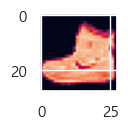

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[:1][0])
plt.show()

range(0, 30)


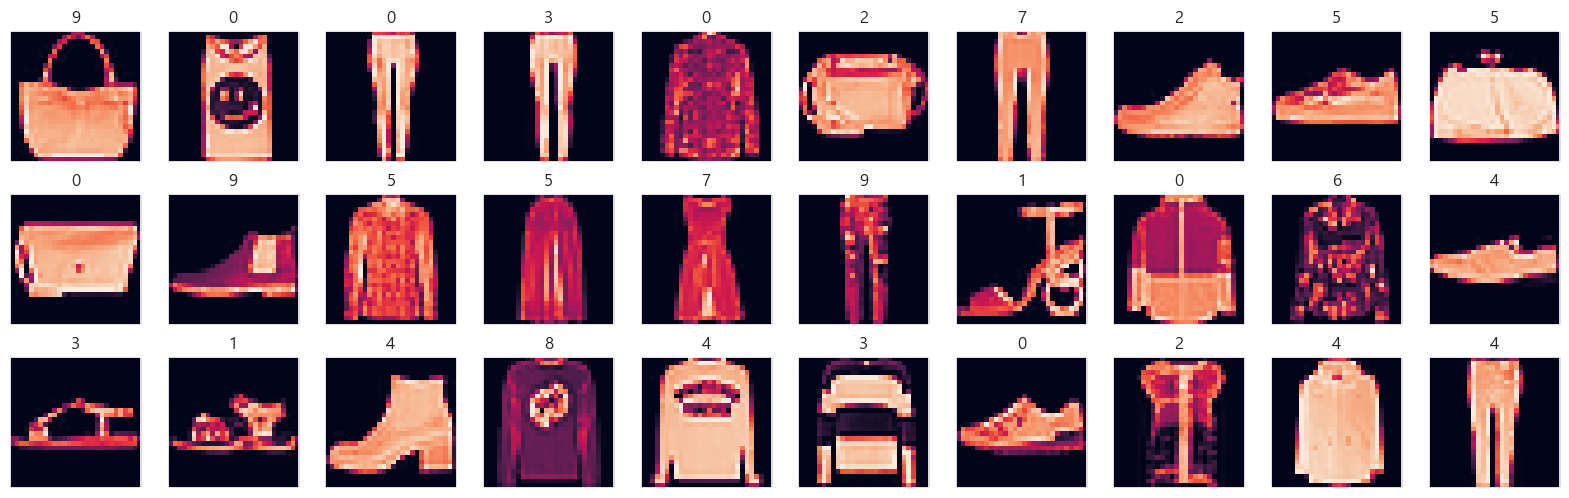

In [9]:
fig, axes = plt.subplots(3,10, figsize=(20,6))
print(range(X_train[:30].shape[0]))
for i, px_arr in enumerate(X_train[100:130]) : 
    row = i // 10
    col = i % 10
    axes[row][col].imshow(px_arr)
    axes[row][col].set_title(y_train[i])
    # Hide axes,grid
    axes[row][col].grid(False)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])
plt.show()

## target 분포도

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64


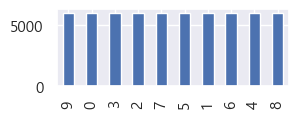

In [10]:
print( pd.Series(y_train).value_counts() )
plt.figure(figsize=(3,1))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.show()

## mnist : 숫자N 이미지

Int64Index([0, 11, 15, 42, 44, 79, 84, 88, 89, 90], dtype='int64')


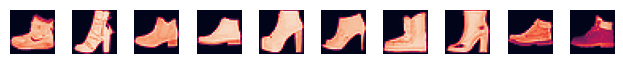

In [11]:
s = pd.Series(y_train)
idx_list =  s[s.values == 9].index[:10] 
print(idx_list)

for i, px_arr in enumerate(X_train[idx_list]):
    plt.subplot(3,10, i+1)
    plt.imshow(px_arr)
    plt.axis('off')
    plt.grid(False)
plt.tight_layout()
plt.show()


In [12]:
s = pd.Series(y_train)
idx_list = []
for N in range(10) :
    idx_list.extend( s[s.values==N].index[:10] )
print( len(idx_list) , idx_list )

100 [1, 2, 4, 10, 17, 26, 34, 48, 61, 64, 16, 21, 38, 69, 71, 74, 78, 80, 86, 97, 5, 7, 27, 37, 45, 53, 54, 65, 92, 123, 3, 20, 25, 31, 47, 49, 50, 51, 58, 59, 19, 22, 24, 28, 29, 68, 75, 76, 96, 117, 8, 9, 12, 13, 30, 36, 43, 60, 62, 63, 18, 32, 33, 39, 40, 55, 56, 72, 77, 95, 6, 14, 41, 46, 52, 83, 85, 87, 108, 119, 23, 35, 57, 99, 100, 105, 109, 110, 130, 144, 0, 11, 15, 42, 44, 79, 84, 88, 89, 90]


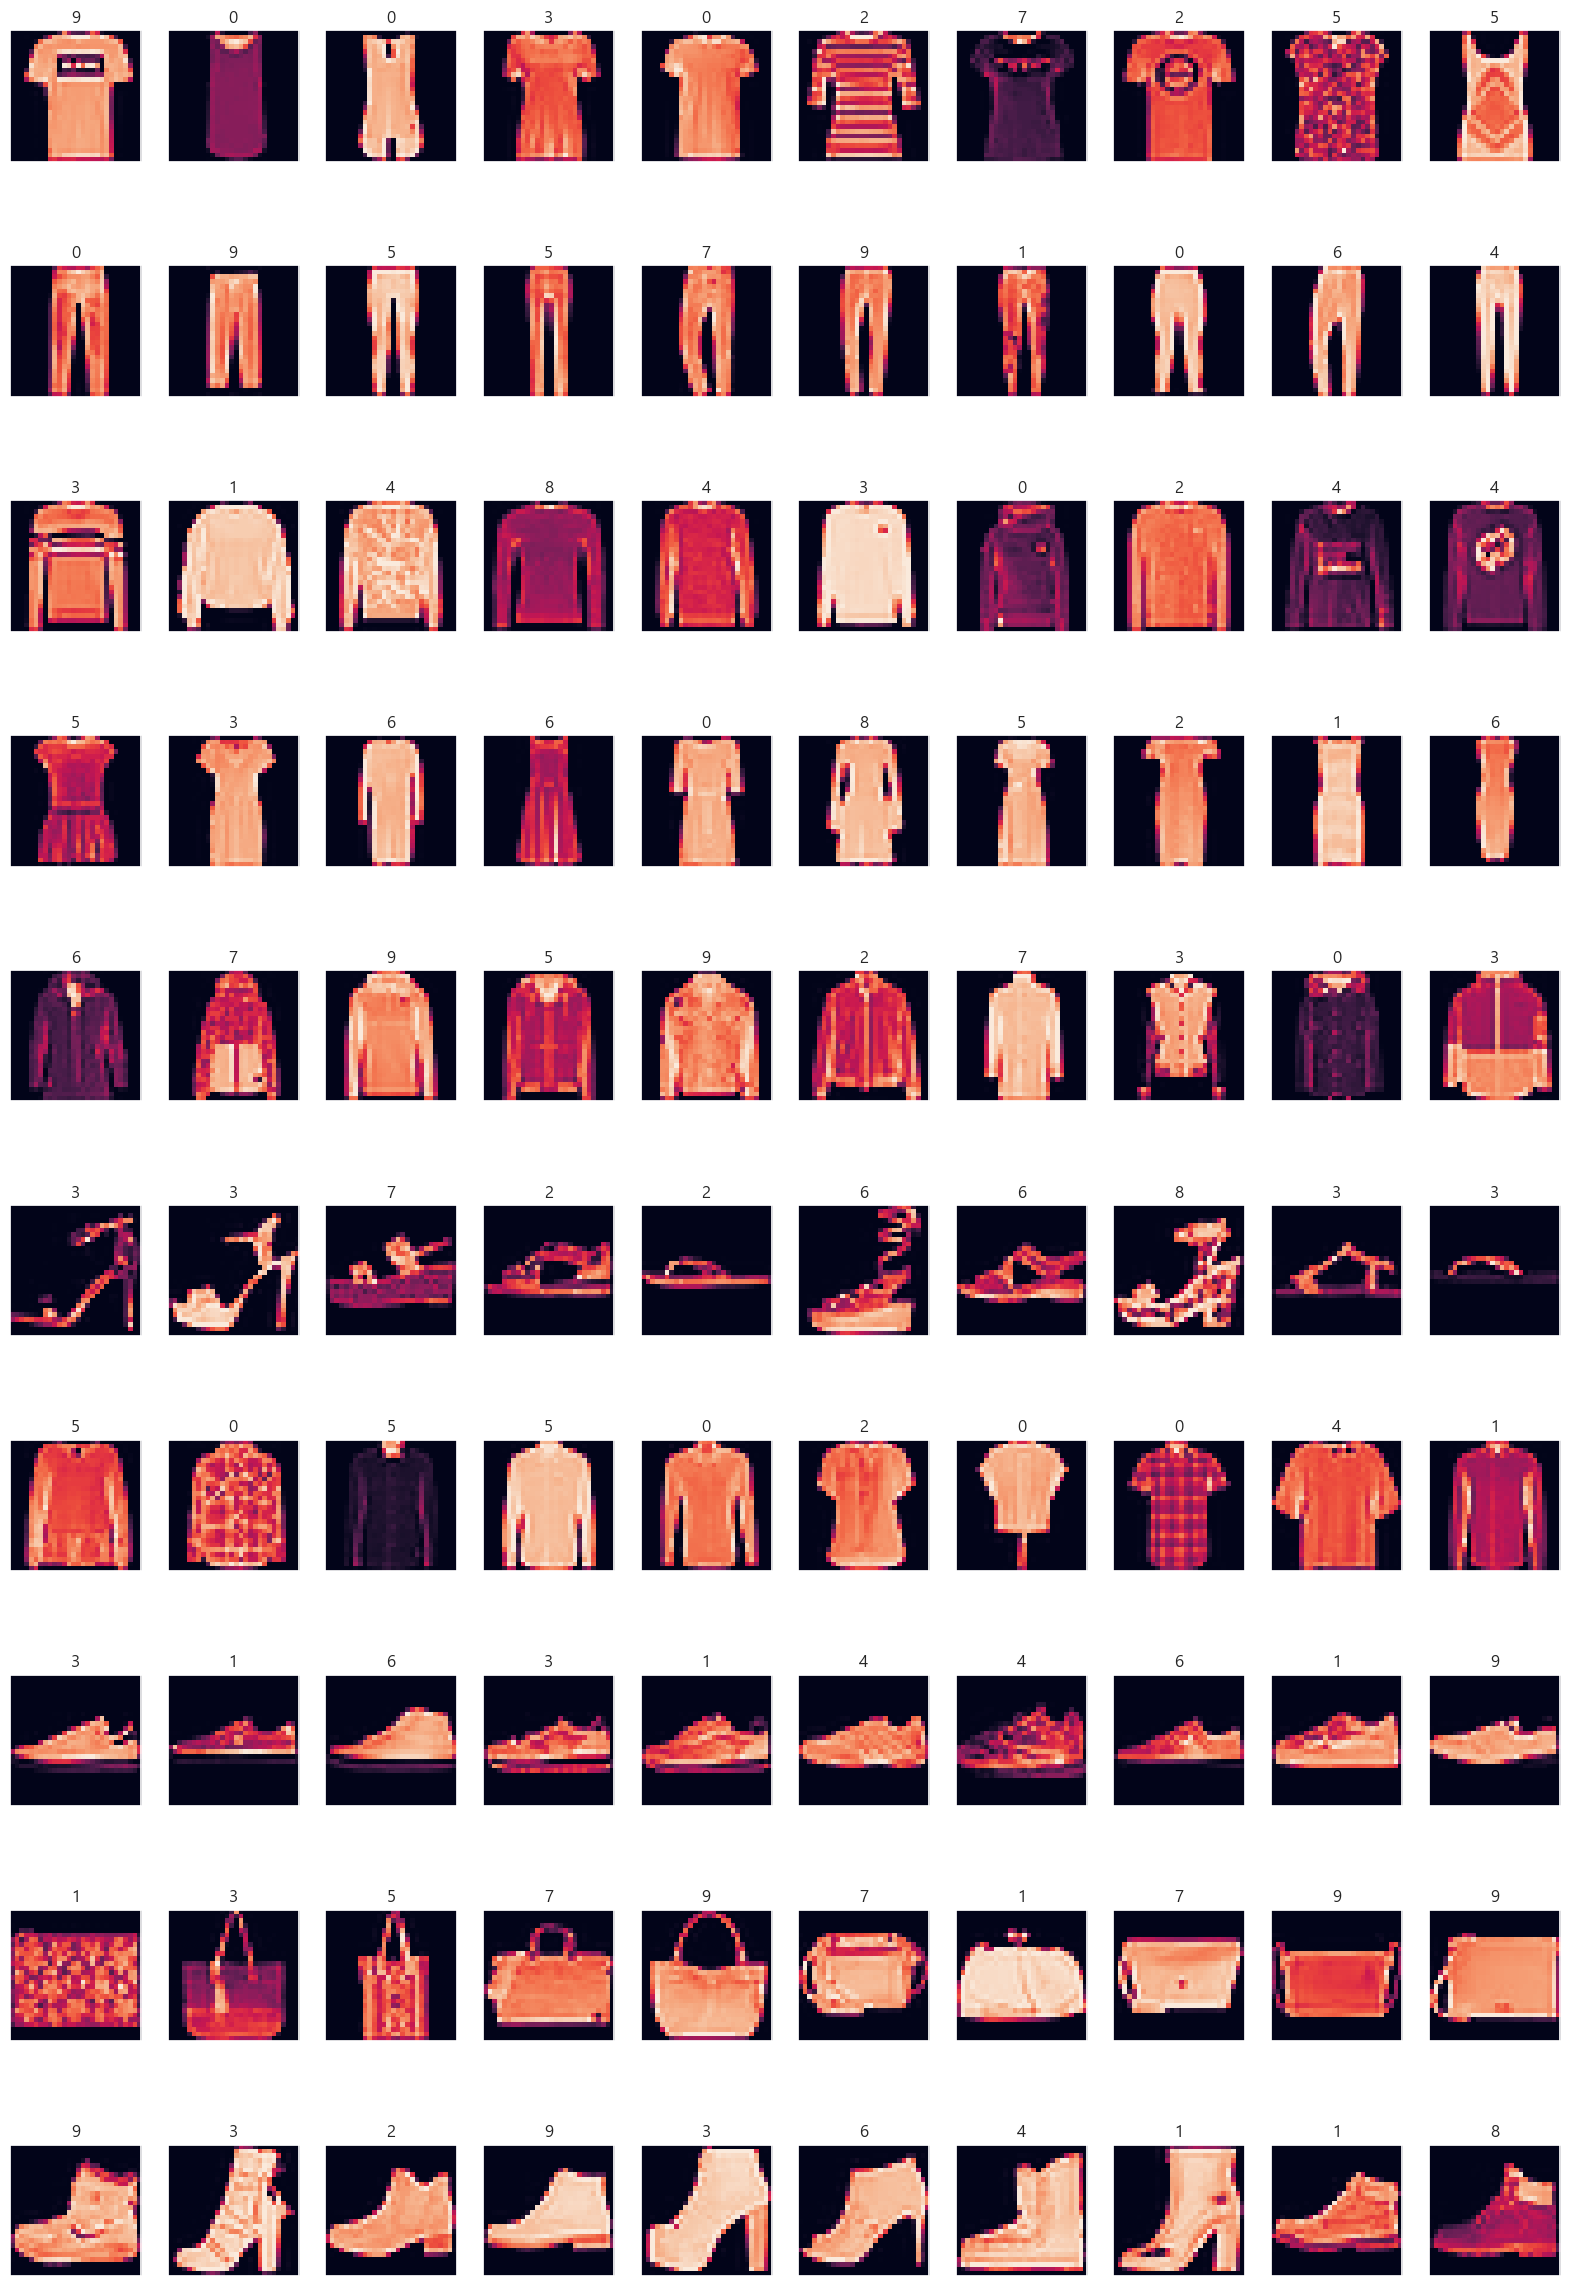

In [13]:
fig, axes = plt.subplots(10,10, figsize=(20,30))
# for i, px_arr in enumerate(X_train[100:130]) :     
for i, px_arr in enumerate(X_train[idx_list]) :
    row = i // 10
    col = i % 10
    axes[row][col].imshow(px_arr)
    axes[row][col].set_title(y_train[i])
    # Hide axes,grid
    axes[row][col].grid(False)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])
plt.show()


# 전처리 & 가공

## Flatten
* 이미지 픽셀 (28*28) : 행렬(2D) --> arr(1D)

### 1장

In [14]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

## 정규화(픽셀값 스케일링)
* 0 ~ 255 픽셀값을 0 ~1 값으로 변경
* MinMaxScaler()

In [15]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test / 255.0

## target 더미화 
* sklearn : OneHotEncoder(), pd.get_dummies()
* keras : utils.to_categorical()
* 0 ~ 9 숫자 : 원핫인코딩 
    * 0 : 1000000000
    * 1 : 0100000000 

In [16]:
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train, num_classes=10, dtype='int')
y_test_oh  = to_categorical(y_test , num_classes=10, dtype='int')

print(y_train[:5])
print(y_train_oh[:5])

[9 0 0 3 0]
[[0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


# 모델 (Neural Network, FC)

## 모델&학습

In [17]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

In [18]:
model = Sequential()
model.add(Dense(units=300, input_dim=28*28, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [19]:
fit_history = model.fit(X_train_scaler, y_train_oh
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_history)
print ( model.evaluate(X_test_scaler, y_test_oh)  )

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.5516 - accuracy: 0.8103 - val_loss: 0.4260 - val_accuracy: 0.8475
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3848 - accuracy: 0.8616 - val_loss: 0.3820 - val_accuracy: 0.8612
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3422 - accuracy: 0.8761 - val_loss: 0.3656 - val_accuracy: 0.8637
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3174 - accuracy: 0.8863 - val_loss: 0.3588 - val_accuracy: 0.8692
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2992 - accuracy: 0.8898 - val_loss: 0.3325 - val_accuracy: 0.8788
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2796 - accuracy: 0.8971 - val_loss: 0.3437 - val_accuracy: 0.8788
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2688 - accuracy: 0.8989 - val_loss: 0.3440 - val_accuracy: 0.8765
Epoch 

## 평가 시각화

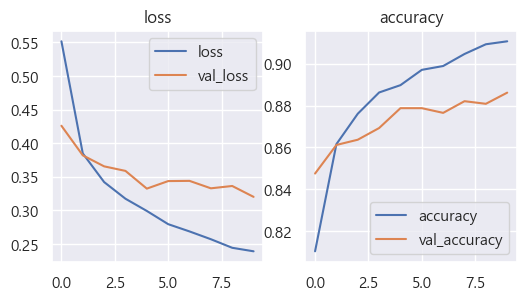

In [20]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_history.history['loss']    , label='loss')
ax1.plot(fit_history.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_history.history['accuracy']    , label='accuracy')
ax2.plot(fit_history.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 예측

## 예측

In [21]:
proba = model.predict(X_test_scaler)
proba[:3]

313/313 [==============================] - 1s 3ms/step


array([[1.03230568e-05, 1.40990105e-05, 9.08497839e-07, 7.73364081e-06,
        6.96941970e-06, 2.30831589e-04, 7.80491405e-07, 5.66719798e-03,
        1.07993242e-06, 9.94060099e-01],
       [4.52604982e-05, 3.02028985e-10, 9.99778450e-01, 3.41684836e-09,
        7.64722427e-05, 4.63231985e-15, 9.98602482e-05, 2.53857491e-10,
        5.12991094e-10, 3.56334515e-12],
       [2.51821508e-10, 1.00000000e+00, 2.14327674e-13, 2.37204617e-10,
        2.81220290e-11, 6.64471089e-16, 1.13899327e-10, 2.16889562e-14,
        9.87121778e-15, 1.79832135e-10]], dtype=float32)

In [22]:
pred   = np.argmax(proba, axis=1)
y_test = np.argmax(y_test_oh, axis=1)
print(pred[:3], y_test[:3])

[9 2 1] [9 2 1]


## 오답 검증
* sklearn.metrics.<b>confusion_matrix()</b>
* pandas.<b>crosstab(index, columns, values=None, rownames=None, colnames=None</b>, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)


In [23]:
ans_df = pd.DataFrame( {"y_test": y_test, "pred":pred})
ans_df.head()

,y_test,pred
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [24]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, pred)
print(res)

[[804   3  22  47   4   0 112   0   8   0]
 [  0 973   2  20   3   0   1   0   1   0]
 [ 16   0 878  15  56   0  34   0   1   0]
 [ 12   8  20 916  24   0  16   0   4   0]
 [  1   1 163  40 747   0  45   0   3   0]
 [  0   0   0   1   0 951   0  24   1  23]
 [103   0 141  34  67   1 646   0   8   0]
 [  0   0   0   0   0   6   0 932   1  61]
 [  3   0   4   4   3   2   3   3 978   0]
 [  0   0   0   0   0   6   1  15   0 978]]


In [25]:
pd.crosstab(index=y_test, columns=pred,  rownames=['True'], colnames=['Pred'])

Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,804,3,22,47,4,0,112,0,8,0
1,0,973,2,20,3,0,1,0,1,0
2,16,0,878,15,56,0,34,0,1,0
3,12,8,20,916,24,0,16,0,4,0
4,1,1,163,40,747,0,45,0,3,0
5,0,0,0,1,0,951,0,24,1,23
6,103,0,141,34,67,1,646,0,8,0
7,0,0,0,0,0,6,0,932,1,61
8,3,0,4,4,3,2,3,3,978,0


In [26]:
## 오답 idx
idx_list = ans_df[ ans_df['y_test'] != ans_df['pred']  ].index
len(idx_list)

1197

In [27]:
pd.Series(y_test[idx_list]).value_counts()

6    354
4    253
0    196
2    122
3     84
7     68
5     49
1     27
9     22
8     22
dtype: int64

* by 형진

In [28]:
xdf = ans_df[ans_df['pred']!= ans_df['y_test']]
xdf = xdf.sort_values(by='y_test')
xdf.head()

,y_test,pred
4965,0,6
3919,0,8
2953,0,2
1340,0,3
8454,0,6


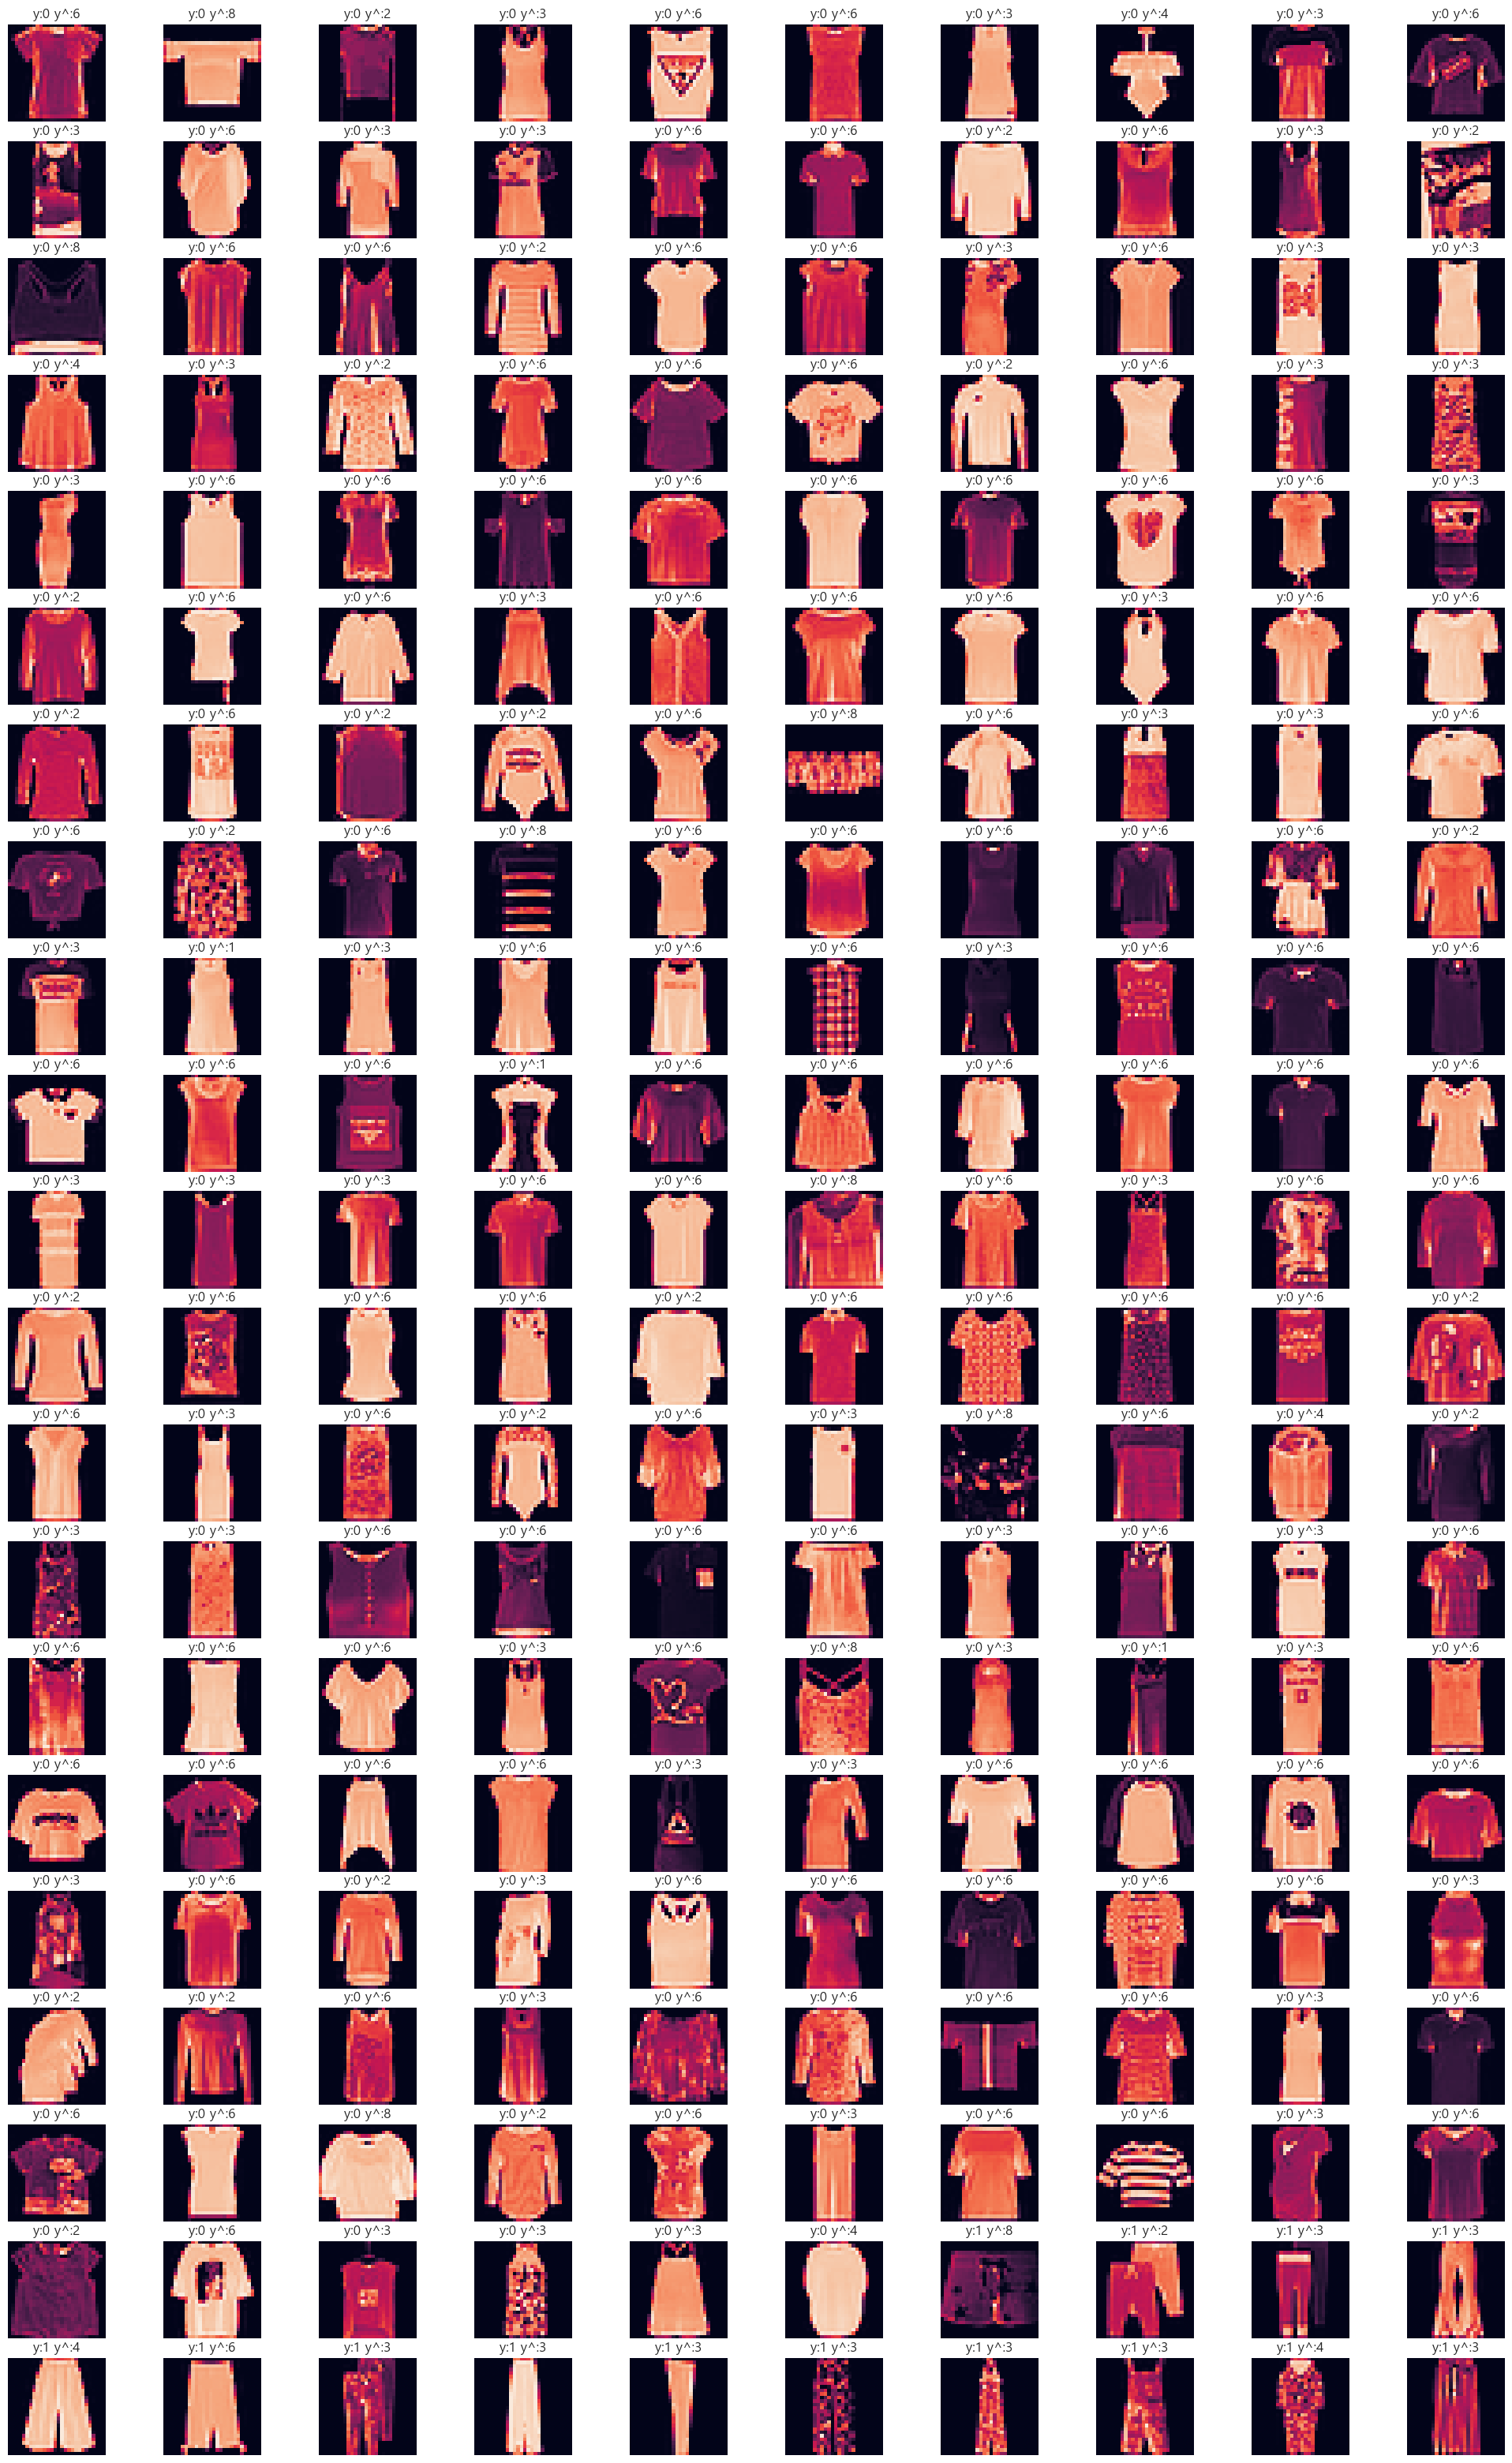

In [29]:
plt.figure(figsize=(25,40))

for i, idx in enumerate(xdf.index[:210]):
    plt.subplot(21,10,i+1)
    plt.title(f"y:{xdf.loc[idx, 'y_test']} y^:{xdf.loc[idx, 'pred']}")
    plt.imshow(X_test[idx].reshape(28,28))
    plt.axis('off')
    plt.grid(False)
    
# plt.tight_layout()    
plt.show()

In [30]:
# fig, axes = plt.subplots(21,10, figsize=(20,30))
# for i, idx in enumerate(idx_list) :     
#     row = i // 10
#     col = i % 10
#     axes[row][col].imshow(X_test[idx].reshape(28,28))
#     axes[row][col].set_title(f"{ans_df.loc[idx,'y_test']} {ans_df.loc[idx,'pred']}" )
#     # Hide axes,grid
#     axes[row][col].grid(False)
#     axes[row][col].set_xticks([])
#     axes[row][col].set_yticks([])
# plt.show()

# 사용자 데이터 예측
* Jupyter Web Widget : https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [31]:
import ipywidgets as widgets
btn = widgets.FileUpload(
    accept='image/*',    #'.png', 'image/*,.pdf'
    multiple=True
)
display(btn)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [35]:
btn.value

({'name': 'nike_shoes.webp',
  'type': 'image/webp',
  'size': 87852,
  'content': <memory at 0x0000028678EB0AC0>,
  'last_modified': datetime.datetime(2023, 4, 12, 7, 9, 14, 307000, tzinfo=datetime.timezone.utc)},)

In [36]:
from PIL import Image
import io
for dic in btn.value:
    display(widgets.Image(value=dic.content.tobytes()))

Image(value=b'RIFF$W\x01\x00WEBPVP8X\n\x00\x00\x00 \x00\x00\x00\xbf\x06\x00o\x08\x00ICCP0\x02\x00\x00\x00\x00.…

nike_shoes.webp  87852
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 36ms/step
7


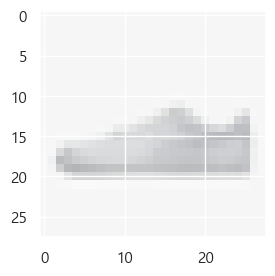

In [37]:
from PIL import Image
import io
for i, dic in enumerate(btn.value):
    plt.subplot(1,2,i+1)
    print(f"{dic['name']}  {dic['size']}")
    
    # ------------------------------------------------
    # a = dic['content']
    # b = dic['content'].tobytes()
    # c = io.BytesIO(dic['content'])
    # print(a, b, c)
    # ------------------------------------------------
    # display(widgets.Image(value=dic.content.tobytes()))
    # ------------------------------------------------
    img = Image.open(io.BytesIO(dic['content'])).resize((28, 28)) 
    plt.imshow(img)
    # ------------------------------------------------
    print(np.array(img).shape,  np.array(img)[:, :, 1].shape)
    
    img = np.array(img)[:, :, 1]
    img = (np.expand_dims(img,0)).reshape(1,-1)
    print(img.shape) 

    img_scaler = img/255.0
    img_scaler = (255-img)/255.0
    
    print(img_scaler.shape)
    proba = model.predict(img_scaler)
    print(np.argmax(proba))